# Árvore de Decisão
### Prompt: "faça um código em python que utilize scikit learn com dataset iris e que utlize o algoritmo de árvore de decisão e mostre resultados com matriz de confusão, acurácia, recall, precisão, f1-score e ROC"
### Resultado:

Matriz de confusão:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Acurácia: 1.00
Recall: 1.00
Precisão: 1.00
F1-score: 1.00


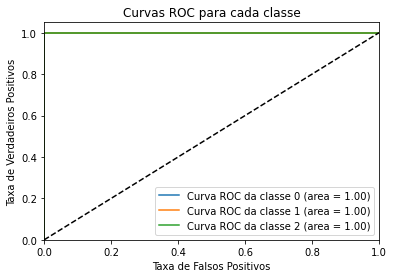

In [16]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, recall_score, precision_score, f1_score,
                             roc_curve, auc)
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Carregar o dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Binarizar os rótulos para cálculo da curva ROC
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Dividir o dataset em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar e treinar o modelo de árvore de decisão com OneVsRestClassifier
clf = OneVsRestClassifier(DecisionTreeClassifier(random_state=42))
clf.fit(X_train, y_train)

# Fazer previsões com o modelo treinado
y_pred = clf.predict(X_test)

# Calcular e exibir as métricas solicitadas
conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Matriz de confusão:\n", conf_matrix)
print("Acurácia: {:.2f}".format(acc))
print("Recall: {:.2f}".format(recall))
print("Precisão: {:.2f}".format(precision))
print("F1-score: {:.2f}".format(f1))

# Calcular a curva ROC e AUC para cada classe
y_prob = clf.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Traçar a curva ROC para cada classe
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='Curva ROC da classe {} (area = {:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curvas ROC para cada classe')
plt.legend(loc="lower right")
plt.show()


arvore de decisao: Ao analisar o código fornecido, é possível identificar algumas áreas em que se pode aplicar melhorias para torná-lo mais legível, modular e com um melhor desempenho. Primeiramente, seria recomendável dividir o código em funções menores e específicas, o que facilitaria a leitura, manutenção e reutilização do código em projetos futuros. Além disso, é importante que se estratifiquem os dados ao dividi-los em conjuntos de treino e teste, garantindo assim que a distribuição das classes seja proporcional e evitando que o modelo seja enviesado.

Outra melhoria a ser considerada é ajustar os parâmetros do modelo de árvore de decisão, utilizando técnicas como Grid Search ou Random Search, para encontrar a combinação ideal de parâmetros e otimizar o desempenho do modelo. Por fim, a aplicação da validação cruzada é altamente recomendada, pois essa técnica oferece uma estimativa mais precisa do desempenho do modelo e ajuda a reduzir a possibilidade de overfitting. Ao aplicar essas melhorias, garantir-se-á uma avaliação mais confiável do desempenho do modelo de classificação e otimizar-se-á a implementação.